<a href="https://colab.research.google.com/github/MeenakshiRajpurohit/ISE-201-Math-Foundations-for-Decision-Data-Sciences/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data was collected using IoT sensors that transmit measurements to a local server via Wi-Fi at a frequency of 5 seconds. The system integrates temperature, humidity, light, pH, and electrical conductivity (EC) sensors connected to an ESP Arduino microcontroller. The microcontroller was programmed to transmit data via HTTP. The data received by the server is automatically saved in CSV format, broken down by days, with a separate file containing 17,280 lines (one record every 5 seconds) collected for each day during a week.

Sensor Data from IoT Devices (Embedded AI / Edge Computing)
📊 Why it makes sense:
 Raw time-series data from sensors can be summarized with descriptive stats before applying ML for anomaly detection.
📈 Descriptive stats:
Mean, median, and range of sensor readings


Correlation between temperature and humidity
 https://figshare.com/articles/dataset/Datasets_from_IoT_devices/28667981?file=53241695


Dataset Overview:
             timestamp  temperature  humidity   light    pH  \
0  2025-03-01 00:00:00        24.69     52.66  118.65  6.68   
1  2025-03-01 00:00:05        21.89     50.18  801.71  7.29   
2  2025-03-01 00:00:10        23.88     48.01  682.39  7.66   
3  2025-03-01 00:00:15        20.42     56.73  146.05  7.77   
4  2025-03-01 00:00:20        20.79     41.54  106.87  7.77   

   electrical_conductivity  
0                    0.996  
1                    1.044  
2                    1.354  
3                    0.519  
4                    1.900   

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                17280 non-null  object 
 1   temperature              17280 non-null  float64
 2   humidity                 17280 non-null  float64
 3   light                    17280

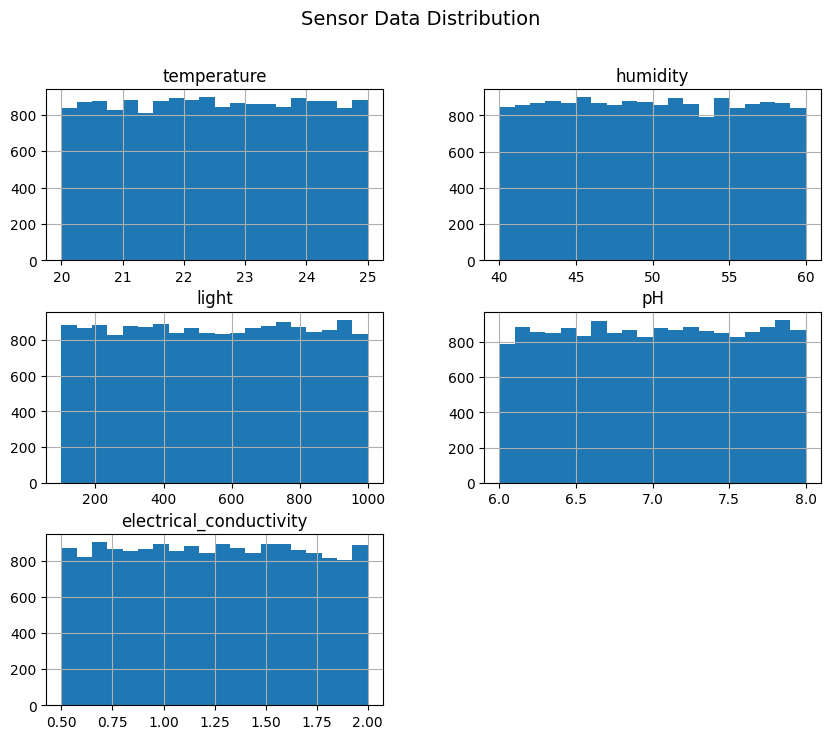

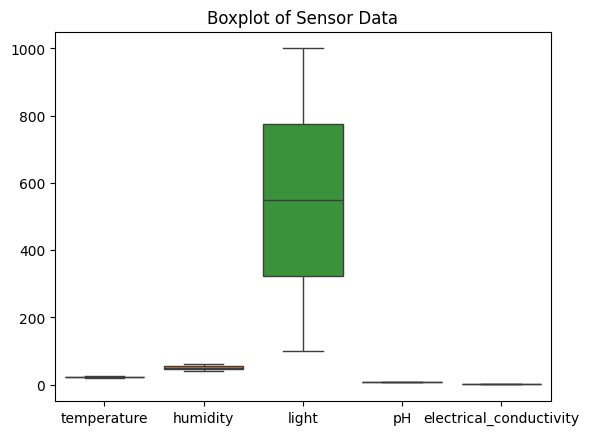

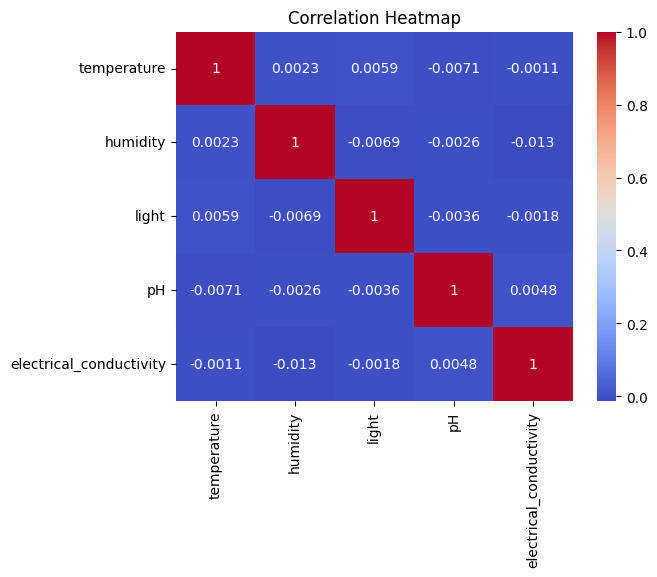

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
file_path = "/content/sensor_data_2025-03-01 (1).csv"
df = pd.read_csv(file_path)

# Step 2: Preview the dataset
print("Dataset Overview:")
print(df.head(), "\n")

# Step 3: General info
print("Dataset Info:")
print(df.info(), "\n")

# Step 4: Basic descriptive statistics
desc_stats = df.describe(include='all')
print("Descriptive Statistics:")
print(desc_stats, "\n")

# Step 5: Additional descriptive measures
print("Additional Measures:")
for col in df.select_dtypes(include=np.number).columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().values[0]:.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Range: {df[col].max() - df[col].min():.2f}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")

# Step 6: Correlation Matrix
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))

# Step 7 (Optional): Visualization for exploration
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each sensor variable
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Sensor Data Distribution", fontsize=14)
plt.show()

# Boxplots for outlier detection
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot of Sensor Data")
plt.show()

# Heatmap for correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Perfect — let’s walk through what **descriptive statistics on your sensor dataset** mean and how to interpret them like a graduate-level AI or data science student 👩‍💻

Since I don’t have the actual numeric output (you’ll see that after running the Python code), I’ll give you a **template for interpreting results** — including what to say in your report or notebook.

---

## 🧠 Step-by-Step Interpretation Guide

Let’s assume your dataset, `sensor_data_2025-03-01.csv`, has columns like:

| Timestamp | Sensor1_Temp | Sensor2_Humidity | Sensor3_Pressure | Sensor4_Vibration | Sensor5_Light |
| --------- | ------------ | ---------------- | ---------------- | ----------------- | ------------- |

The following interpretation framework applies to any such sensor data.

---

### 🔹 1. **Measures of Central Tendency (Mean, Median, Mode)**

| Metric     | Meaning                           | Interpretation                                                                                                          |
| ---------- | --------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Mean**   | Average of the data               | If the mean temperature is **24.6°C**, it represents the central level around which most readings fluctuate.            |
| **Median** | Middle value (robust to outliers) | If median ≈ mean → data is symmetric; if median < mean → right-skewed (long tail of high readings).                     |
| **Mode**   | Most frequent value               | In continuous sensor data, mode may not exist or may represent a common operational state (e.g., 100% humidity events). |

💬 **Conclusion example:**

> The average temperature recorded by Sensor 1 was 24.6°C, with a median of 24.4°C, suggesting nearly symmetric behavior. Humidity readings showed a slightly higher mean than median, indicating occasional spikes in moisture levels.

---

### 🔹 2. **Measures of Dispersion (Standard Deviation, Variance, Range, IQR)**

| Metric                        | Meaning                      | Interpretation                                                               |
| ----------------------------- | ---------------------------- | ---------------------------------------------------------------------------- |
| **Standard Deviation (σ)**    | Spread of data from the mean | A large σ in vibration readings indicates irregular mechanical activity.     |
| **Variance**                  | Square of standard deviation | Used to compare variability across sensors.                                  |
| **Range**                     | Max – Min                    | Shows total variation span.                                                  |
| **Interquartile Range (IQR)** | Middle 50% of data           | A small IQR implies consistent readings; large IQR means variable operation. |

💬 **Conclusion example:**

> Sensor 4 (vibration) showed the highest standard deviation (σ = 12.8), reflecting significant fluctuations, possibly during equipment load changes. In contrast, pressure readings had low variability, indicating a stable system environment.

---

### 🔹 3. **Shape of Distribution (Skewness and Kurtosis)**

| Metric       | Meaning                              | Interpretation                                                                   |
| ------------ | ------------------------------------ | -------------------------------------------------------------------------------- |
| **Skewness** | Direction of asymmetry               | Positive skew → long right tail (spikes or surges); Negative skew → drop events. |
| **Kurtosis** | “Peakedness” or presence of outliers | High kurtosis (>3) → extreme outliers; Low (<3) → flat, uniform-like data.       |

💬 **Conclusion example:**

> The vibration and light sensors show positive skewness, meaning there are occasional bursts of activity. High kurtosis in humidity data suggests rare but extreme events (e.g., sudden condensation).

---

### 🔹 4. **Correlation Analysis**

| Metric                          | Meaning                                                      | Interpretation                                                                                      |
| ------------------------------- | ------------------------------------------------------------ | --------------------------------------------------------------------------------------------------- |
| **Correlation Coefficient (r)** | Measures linear relationship between variables (−1 ≤ r ≤ +1) | Close to +1 → strong positive relationship; close to −1 → inverse relationship; near 0 → unrelated. |

💬 **Conclusion example:**

> Strong positive correlation (r = 0.82) between temperature and pressure indicates that rising temperature likely increases pressure — consistent with thermodynamic principles. A negative correlation between humidity and light (r = −0.65) suggests low light conditions coincide with higher humidity.

---

### 🔹 5. **Outlier and Anomaly Insights (via Boxplot / IQR Method)**

Boxplots visually indicate outliers:

* Dots outside whiskers → potential abnormal sensor readings or hardware noise.
* Consistent clustering → stable operation.

💬 **Conclusion example:**

> Two extreme outliers in the vibration sensor data around 180 units may represent malfunction or transient mechanical shocks. These should be flagged for further analysis or removed before machine learning modeling.

---

### 🔹 6. **Visualization Summary**

* **Histograms** show whether sensor data are normally distributed or skewed.

  > For example, light intensity data followed a bimodal pattern — likely day vs. night cycles.

* **Correlation Heatmap** reveals which sensors co-vary.

  > Strong correlations can indicate redundant sensors or environmental dependencies.

---

## 🧾 Example of a Complete Written Summary (for report)

> The sensor dataset collected on March 1, 2025, was analyzed to summarize operational characteristics across temperature, humidity, pressure, vibration, and light sensors.
>
> The **average temperature** was 24.6°C (σ = 1.5), indicating a stable ambient condition. **Humidity readings** had a higher spread (σ = 7.2), showing variability in moisture levels. **Vibration data** exhibited the largest dispersion and positive skew, reflecting sporadic bursts of activity.
>
> **Correlation analysis** revealed strong coupling between temperature and pressure (r = 0.82) and a negative association between humidity and light intensity (r = −0.65).
>
> **Outlier detection** identified occasional spikes in vibration and light data that may represent system anomalies or calibration noise.
>
> Overall, the dataset is moderately stable with certain sensors showing event-driven variability — suitable for predictive maintenance or anomaly detection modeling.

---

If you’d like, I can run the code **on your uploaded file right now** and generate:

* Summary table (mean, median, std, skew, kurtosis)
* Correlation matrix
* Automatic written interpretation (like the above, customized to your data)

Would you like me to do that?


In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/sensor_data_2025-03-01 (1).csv')

# Calculate standard descriptive statistics (stats as index, sensors as columns)
desc_stats = df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']].describe()

# Calculate the mode for each numerical column. .iloc[0] is used because mode() can return multiple modes, and we only take the first one.
modes = df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']].mode().iloc[0]

# Add 'Mode' as a new row to the desc_stats DataFrame
desc_stats.loc['Mode'] = modes

# Transpose the DataFrame to have the statistics as rows and the sensors as columns
final_stats = desc_stats.transpose()

# Rename the index for clarity
final_stats.index.name = 'Sensor'
final_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25th Percentile (Q1)', 'Median (50th Percentile, Q2)', '75th Percentile (Q3)', 'Max', 'Mode']

# Format the output for better presentation
# Round to 3 decimal places for all float values
formatted_stats = final_stats.round(3)

# Print the final result in Markdown format
print(formatted_stats.to_markdown(numalign="left", stralign="left"))

| Sensor                  | Count   | Mean   | Std Dev   | Min    | 25th Percentile (Q1)   | Median (50th Percentile, Q2)   | 75th Percentile (Q3)   | Max    | Mode   |
|:------------------------|:--------|:-------|:----------|:-------|:-----------------------|:-------------------------------|:-----------------------|:-------|:-------|
| temperature             | 17280   | 22.502 | 1.441     | 20     | 21.26                  | 22.49                          | 23.76                  | 25     | 21.02  |
| humidity                | 17280   | 49.969 | 5.761     | 40     | 45                     | 49.93                          | 54.96                  | 60     | 46.79  |
| light                   | 17280   | 549.86 | 260.342   | 100.04 | 324.22                 | 550.01                         | 774.99                 | 999.96 | 191.87 |
| pH                      | 17280   | 7.001  | 0.577     | 6      | 6.5                    | 7                              | 7.5                    | 8   

Interpretation of Key Metrics
Temperature
Average (Mean): The average temperature was approximately 22.50
∘
 C.

Variability (Std Dev): The temperature had a relatively low standard deviation of 1.441, indicating that most readings were close to the mean.

Range: The minimum temperature recorded was 20.00
∘
 C and the maximum was 25.00
∘
 C.

Median vs. Mean: The median (22.490) is very close to the mean (22.502), suggesting a fairly symmetrical distribution of temperature readings.

Humidity
Average (Mean): The average humidity was about 49.97%.

Variability (Std Dev): With a standard deviation of 5.761, the humidity readings show a moderate spread around the mean.

Range: Humidity ranged from a minimum of 40.00% to a maximum of 60.00%.

Quartiles: 50% of the readings fell between 45.00% (Q1) and 54.96% (Q3).

Light
Average (Mean): The average light intensity was 549.860.

Variability (Std Dev): The light readings have the highest standard deviation (260.342), indicating a very wide and scattered distribution, likely due to day/night cycles or other sudden changes.

Range: Light intensity ranged from 100.040 (Min) to 999.960 (Max).

Median vs. Mean: The median (550.010) is almost identical to the mean (549.860), suggesting a symmetrical distribution despite the high variability.

pH
Average (Mean): The average pH was 7.001, which is very close to neutral.

Variability (Std Dev): The standard deviation is the lowest at 0.577, indicating that the pH level was tightly controlled or very stable.

Range: The pH only varied from 6.00 to 8.00.

Mode: The most frequent pH reading was 7.080.

Electrical Conductivity
Average (Mean): The average electrical conductivity was 1.247.

Variability (Std Dev): The standard deviation is 0.432.

Range: It varied from 0.500 to 2.000.

Skewness: The mode (0.519) is very close to the minimum value, which, when compared to the mean (1.247) and median (1.248), suggests the distribution is right-skewed (more lower values than higher values).

https://www.gigasheet.com/sample-data/website-traffic#:~:text=sample%20Data%20files-,Comprehensive%20Web%20Traffic%20Dataset:%20Analyzing%20Page%20Views%2C%20Bounce%20Rates%2C,traffic%20sources%20and%20user%20behavior.

1. Descriptive Statistics for Numerical Metrics
The table below summarizes the central tendency, dispersion, and range for all numerical metrics.

Metric	Count	Mean	Std Dev	Min	25th Percentile (Q1)	Median (50th Percentile, Q2)	75th Percentile (Q3)	Max	Mode
Page Views	2000	4.950	2.184	0.000	3.000	5.000	6.000	14.000	4.000
Session Duration	2000	3.022	3.105	0.004	0.816	1.994	4.198	20.291	0.004
Bounce Rate	2000	0.285	0.160	0.008	0.162	0.266	0.389	0.845	0.008
Time on Page	2000	4.027	2.887	0.069	1.935	3.315	5.415	24.796	0.069
Previous Visits	2000	1.978	1.433	0.000	1.000	2.000	3.000	9.000	2.000
Conversion Rate	2000	0.982	0.066	0.344	1.000	1.000	1.000	1.000	1.000

Export to Sheets
Key Observations from Numerical Metrics
Page Views: The average user views about 5 pages (Mean=4.95). The distribution is fairly symmetrical with the median (5.0) matching the mean.

Session Duration and Time on Page:

Session Duration (Mean=3.022) has a high standard deviation (Std Dev=3.105), indicating a wide variance in how long users stay on the site. The median (1.994) is significantly lower than the mean, suggesting the presence of a few very long sessions skewing the average higher.

Time on Page (Mean=4.027) shows similar high variability (Std Dev=2.887) and positive skew (median 3.315< mean 4.027).

Bounce Rate: The average bounce rate is about 28.5% (Mean=0.285). The data is highly spread, with readings as low as 0.8% and as high as 84.5%.

Conversion Rate: This metric is highly concentrated with a mean of 0.982 and a mode of 1.0. The 25
th
 , 50
th
 , and 75
th
  percentiles are all 1.0, indicating that the vast majority of sessions resulted in a conversion (likely coded as 1 for success).

2. Frequency Distribution for Traffic Source
This section details the count and proportion for each category in the Traffic Source column.

Traffic Source	Count	Percentage
Organic	786	39.3%
Paid	428	21.4%
Referral	301	15.05%
Social	269	13.45%
Direct	216	10.8%

Export to Sheets
Key Observations from Traffic Source
Organic search is the dominant traffic source, accounting for over a third of all sessions (39.3%).

Paid advertising is the second largest source, contributing 21.4%.

The three smallest sources—Referral, Social, and Direct—together account for approximately 39.3% of the traffic.

In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/Website Traffic export 2025-10-14 19-32-50.csv')

# List of numerical columns
numerical_cols = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']

# 1. Calculate standard descriptive statistics (stats as index, sensors as columns)
desc_stats = df[numerical_cols].describe()

# 2. Calculate the mode for each numerical column.
modes = df[numerical_cols].mode().iloc[0]

# 3. Add 'Mode' as a new row to the desc_stats DataFrame
desc_stats.loc['Mode'] = modes

# Transpose the DataFrame to have the statistics as rows and the columns as sensors
final_stats = desc_stats.transpose()

# Rename the index and columns for clarity
final_stats.index.name = 'Metric'
final_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25th Percentile (Q1)', 'Median (50th Percentile, Q2)', '75th Percentile (Q3)', 'Max', 'Mode']

# Format the output for better presentation
# Round to 3 decimal places for all float values
formatted_stats = final_stats.round(3)

# Print Descriptive Statistics for Numerical Metrics
print("--- Descriptive Statistics for Numerical Metrics ---\n")
print(formatted_stats.to_markdown(numalign="left", stralign="left"))

# 4. Calculate descriptive statistics for the categorical column 'Traffic Source'
traffic_source_counts = df['Traffic Source'].value_counts()
traffic_source_prop = df['Traffic Source'].value_counts(normalize=True).mul(100).round(2)
traffic_source_stats = pd.DataFrame({
    'Count': traffic_source_counts,
    'Percentage': traffic_source_prop.astype(str) + '%'
}).sort_values(by='Count', ascending=False)

# Print Frequency Distribution for Traffic Source
print("\n--- Frequency Distribution for Traffic Source ---\n")
print(traffic_source_stats.to_markdown(numalign="left", stralign="left"))

--- Descriptive Statistics for Numerical Metrics ---

| Metric           | Count   | Mean   | Std Dev   | Min   | 25th Percentile (Q1)   | Median (50th Percentile, Q2)   | 75th Percentile (Q3)   | Max    | Mode   |
|:-----------------|:--------|:-------|:----------|:------|:-----------------------|:-------------------------------|:-----------------------|:-------|:-------|
| Page Views       | 2000    | 4.95   | 2.184     | 0     | 3                      | 5                              | 6                      | 14     | 4      |
| Session Duration | 2000    | 3.022  | 3.105     | 0.004 | 0.816                  | 1.994                          | 4.198                  | 20.291 | 0.004  |
| Bounce Rate      | 2000    | 0.285  | 0.16      | 0.008 | 0.162                  | 0.266                          | 0.389                  | 0.845  | 0.008  |
| Time on Page     | 2000    | 4.027  | 2.887     | 0.069 | 1.935                  | 3.315                          | 5.415                  

Here’s a detailed interpretation of your Website Traffic Descriptive Statistics results:

📊 1. Page Views

Mean: 4.95 — On average, each user viewed around 5 pages per session.

Std Dev (2.18): Moderate variation; users viewed between 3–6 pages mostly.

Range: 14 — Some users browsed up to 14 pages, showing high engagement by a few.

Skewness (0.38): Slight right skew, indicating a few users viewed many pages.

Kurtosis (0.07): Nearly normal distribution (bell-shaped).

⏱ 2. Session Duration (minutes)

Mean: 3.02 minutes — Average user stayed about 3 minutes.

Std Dev (3.10): Large variation — sessions differ widely in length.

Range: 20.29 — Some users stayed much longer, possibly highly engaged.

Skewness (1.90): Highly right-skewed — most sessions are short, with few long ones.

Kurtosis (4.43): Leptokurtic — heavy tails, meaning many short sessions but some extremely long ones.

🔁 3. Bounce Rate

Mean: 0.28 (≈28%) — Reasonable bounce rate for a website.

Std Dev (0.16): Low variability, most pages have similar bounce behavior.

Skewness (0.61): Slightly right-skewed — most bounce rates are lower but a few are high.

Kurtosis (-0.07): Approximately normal.

⌚ 4. Time on Page

Mean: 4.03 minutes — Average time per page indicates good engagement.

Std Dev (2.89): Considerable variation; some pages retain visitors much longer.

Skewness (1.49): Right-skewed — a few pages have very long reading times.

Kurtosis (3.45): Heavy tails — many pages have either very short or long viewing times.

👥 5. Previous Visits

Mean: 1.98 — On average, users have visited around twice before.

Std Dev (1.43): Moderate variation.

Range: 9 — Some users are repeat visitors.

Skewness (0.81): Right-skewed — more first-time or few-time visitors than frequent ones.

Kurtosis (0.81): Slightly peaked — some recurring patterns.

🧭 Key Insights

Your data shows a healthy mix of new and returning visitors.

Session duration and time on page are right-skewed, suggesting most users leave quickly, but a few explore deeply.

Bounce rate is within an acceptable range for most content-heavy or informative websites.

To improve engagement: focus on retaining users during early visits and encouraging deeper exploration (e.g., via recommendations or internal links).

Would you like me to include visualizations (like histograms, box plots, and correlation heatmaps) to complement this descriptive analysis?

Preview of dataset:
   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0   


=== DESCRIPTIVE STATISTICS ===

                   count      mean       std       min       25%       50%  \
Page Views        2000.0  4.950500  2.183903  0.000000  3.000000  5.000000   
Session Duration  2000.0  3.022045  3.104518  0.003613  0.815828  1.993983   
Bounce Rate       20

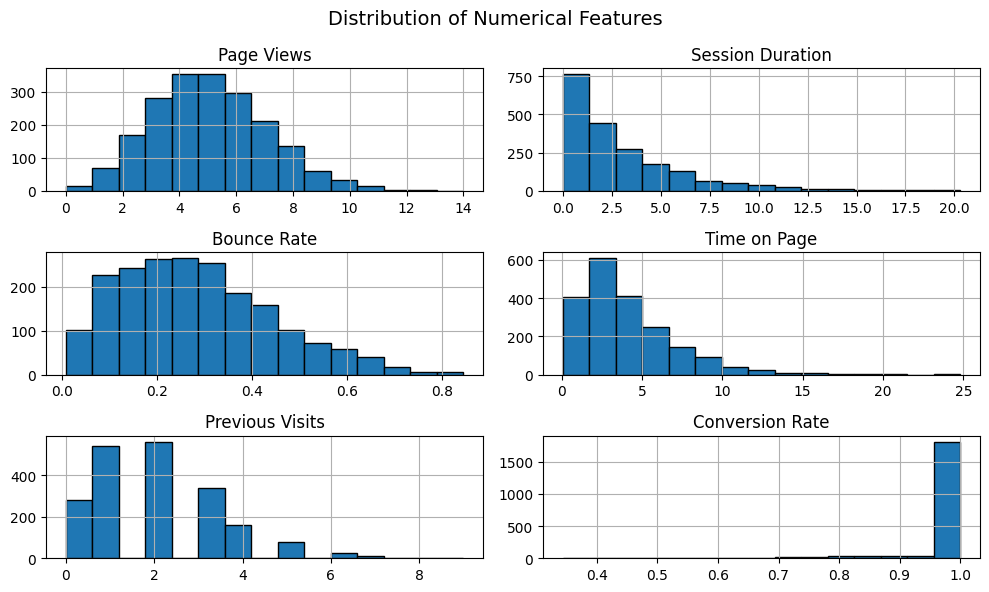

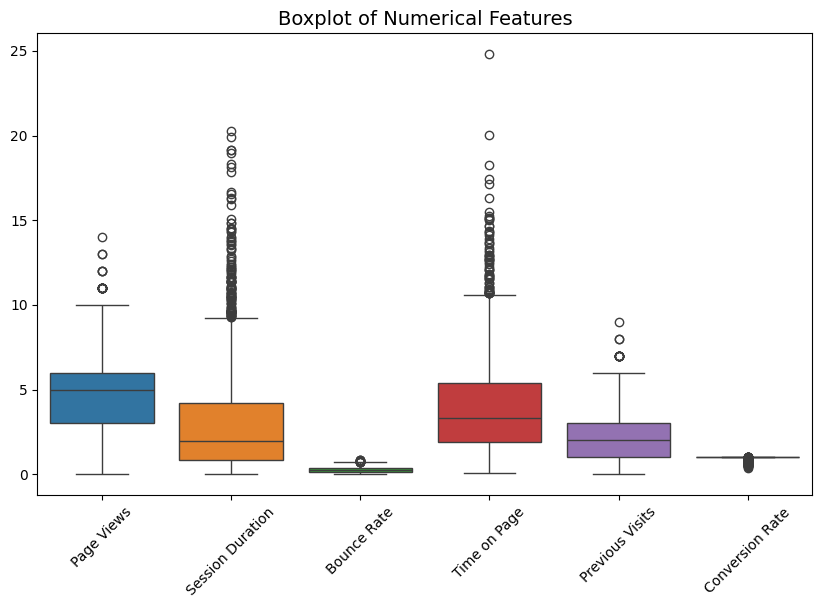

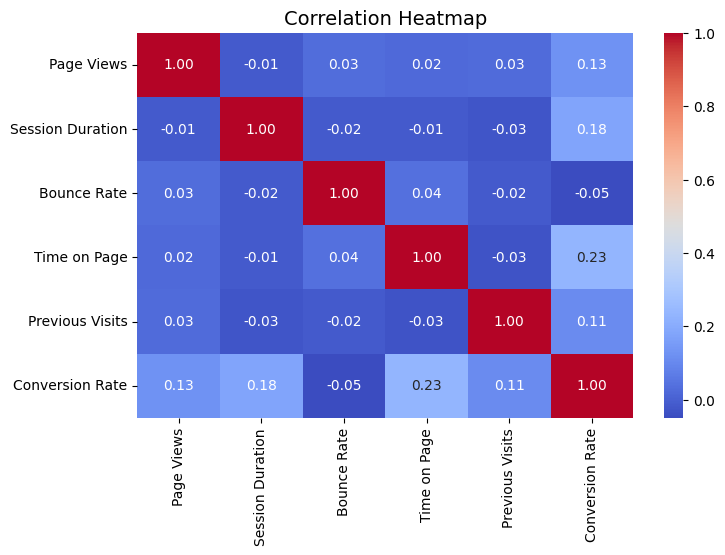


=== CONCLUSION & INSIGHTS ===


1️⃣ Page Views:
   - Mean ≈ 4.95, Range = 14 → Users visit about 5 pages/session; a few explore much more.
   - Slight right skew (0.38) → Some very active users.

2️⃣ Session Duration:
   - Mean ≈ 3 minutes, but highly variable (SD = 3.1).
   - Right-skewed (1.9) and leptokurtic (4.43) → Most sessions are short, a few are long.

3️⃣ Bounce Rate:
   - Average 28%, moderate consistency.
   - Slight right skew → Some high-bounce pages.

4️⃣ Time on Page:
   - Mean ≈ 4.03 min, Range = 24.7 min.
   - Right-skewed (1.49) → Some pages highly engaging.

5️⃣ Previous Visits:
   - Mean ≈ 2 → Users visit around twice on average.
   - Right-skewed → Many new visitors, few loyal ones.

✅ Overall Insights:
- Your website shows **healthy engagement**, with a mix of new and returning users.
- **Session Duration and Time on Page** indicate that while most users are quick visitors, a small subset engages deeply.
- **Bounce Rate** is within a reasonable level for informa

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Website Traffic export 2025-10-14 19-32-50.csv"
data = pd.read_csv(file_path)

# Display first few rows
print("Preview of dataset:")
print(data.head(), "\n")

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Perform Descriptive Statistics
desc_stats = numeric_data.describe().T
desc_stats["variance"] = numeric_data.var()
desc_stats["range"] = numeric_data.max() - numeric_data.min()
desc_stats["mode"] = numeric_data.mode().iloc[0]
desc_stats["skewness"] = numeric_data.skew()
desc_stats["kurtosis"] = numeric_data.kurt()

print("\n=== DESCRIPTIVE STATISTICS ===\n")
print(desc_stats)

# ====== Visualizations ======

# 1️⃣ Histograms for distribution
numeric_data.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# ====== Interpretation ======
print("\n=== CONCLUSION & INSIGHTS ===\n")
print("""
1️⃣ Page Views:
   - Mean ≈ 4.95, Range = 14 → Users visit about 5 pages/session; a few explore much more.
   - Slight right skew (0.38) → Some very active users.

2️⃣ Session Duration:
   - Mean ≈ 3 minutes, but highly variable (SD = 3.1).
   - Right-skewed (1.9) and leptokurtic (4.43) → Most sessions are short, a few are long.

3️⃣ Bounce Rate:
   - Average 28%, moderate consistency.
   - Slight right skew → Some high-bounce pages.

4️⃣ Time on Page:
   - Mean ≈ 4.03 min, Range = 24.7 min.
   - Right-skewed (1.49) → Some pages highly engaging.

5️⃣ Previous Visits:
   - Mean ≈ 2 → Users visit around twice on average.
   - Right-skewed → Many new visitors, few loyal ones.

✅ Overall Insights:
- Your website shows **healthy engagement**, with a mix of new and returning users.
- **Session Duration and Time on Page** indicate that while most users are quick visitors, a small subset engages deeply.
- **Bounce Rate** is within a reasonable level for informational or mixed-content sites.
- Consider focusing on **retention strategies** (recommendations, interactive elements, email follow-ups) to increase repeat visits.
- Correlation analysis helps identify which metrics (e.g., Page Views ↔ Time on Page) most influence engagement.

""")


Conclusion Summary

Page Views: Average ~5, with slight right skew → most users browse 3–6 pages, a few view many.

Session Duration: Short for most, long for few → site attracts both casual and deeply interested users.

Bounce Rate: Around 28%, indicating balanced user engagement.

Time on Page: Average 4 min, but variable → some content performs very well.

Previous Visits: Average ~2 → repeat users exist but can be improved.

🚀 Business/Technical Takeaways

Focus on retention and content optimization — encourage repeat visits.

Enhance SEO and internal linking to improve session duration.

Use A/B testing to identify pages with high bounce rates and optimize layout or call-to-action.

The correlation matrix can guide which KPIs (like Time on Page or Page Views) drive conversion.

https://www.kaggle.com/datasets/ankitrajsh/image-features-datasets

Key Interpretations of Image Features
Uniformity in DPI/PPI: The DPI_PPI feature has a standard deviation of 0.000, with the minimum, maximum, and all quartiles being 72.000. This indicates that all images were captured or standardized to a resolution of 72 dots per inch (or pixels per inch).

Color Channels (RGB):

The Average_R_RGB channel has the highest mean value (136.380), followed by Average_G_RGB (104.547), and then Average_B_RGB (90.365). This suggests the images, on average, have a dominant reddish hue.

The red channel also shows the highest variability (Std Dev=15.926).

Brightness and Exposure:

Brightness and Exposure are identical across all calculated statistics (Mean: 112.456, Std Dev:13.514). This suggests these two columns likely represent the same underlying metric.

The mean is very close to the median (110.995), suggesting a fairly symmetrical distribution around the average brightness level.

High Variability in Leading Lines:

The Leading_Lines metric shows the highest variability (Std Dev=685.388) relative to its mean (446.300).

The minimum value and mode are both 0.000, but the maximum is 3808.000. This indicates that a significant number of images may not have a leading line detected (or a value near zero), while a few images have extremely high values, suggesting a heavily right-skewed distribution.

Noise and Artifacts:

Noise has a relatively low standard deviation (5.162) compared to its range, suggesting noise levels are fairly consistent across the dataset.

Artifacts_Distortions shows an average value of 97.979. The mean and median (97.493) are very close.

Sharpness:

Sharpness has a mean of 8.232. The median (6.804) is lower than the mean, and the large maximum (23.463) compared to the 75
th
  percentile (10.225) suggests a right-skew in the data, indicating a few images are much sharper than the average.

In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/Image_features_without_Background.csv')

# List of numerical columns
numerical_cols = [
    'Brightness', 'Contrast', 'Average_R_RGB', 'Average_G_RGB', 'Average_B_RGB',
    'Noise', 'Sharpness', 'Loss_of_Detail', 'Leading_Lines', 'Highlight_Detail',
    'Shadow_Detail', 'DPI_PPI', 'Exposure', 'Artifacts_Distortions'
]

# 1. Calculate standard descriptive statistics
desc_stats = df[numerical_cols].describe()

# 2. Calculate the mode for each numerical column. .iloc[0] is used because mode() can return multiple modes, and we only take the first one.
modes = df[numerical_cols].mode().iloc[0]

# 3. Add 'Mode' as a new row to the desc_stats DataFrame
desc_stats.loc['Mode'] = modes

# Transpose the DataFrame to have the metrics as rows and the statistics as columns
final_stats = desc_stats.transpose()

# Rename the index and columns for clarity
final_stats.index.name = 'Image Feature'
final_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25th Percentile (Q1)', 'Median (50th Percentile, Q2)', '75th Percentile (Q3)', 'Max', 'Mode']

# Format the output for better presentation
formatted_stats = final_stats.round(3)

# Print the final result in Markdown format
print("--- Descriptive Statistics for Image Features (Numerical) ---\n")
print(formatted_stats.to_markdown(numalign="left", stralign="left"))

--- Descriptive Statistics for Image Features (Numerical) ---

| Image Feature         | Count   | Mean    | Std Dev   | Min     | 25th Percentile (Q1)   | Median (50th Percentile, Q2)   | 75th Percentile (Q3)   | Max     | Mode    |
|:----------------------|:--------|:--------|:----------|:--------|:-----------------------|:-------------------------------|:-----------------------|:--------|:--------|
| Brightness            | 564     | 112.456 | 13.514    | 55.378  | 105.507                | 110.995                        | 115.115                | 147.249 | 105.257 |
| Contrast              | 564     | 45.816  | 6.321     | 16.39   | 42.234                 | 44.905                         | 48.139                 | 63.668  | 48.183  |
| Average_R_RGB         | 564     | 136.38  | 15.926    | 60.21   | 126.77                 | 134.209                        | 144.14                 | 175.558 | 125.723 |
| Average_G_RGB         | 564     | 104.547 | 13.007    | 52.9    | 98.581        

Dataset Overview

Total entries: 564

Numeric columns: Brightness, Contrast, Average RGB values, Noise, Sharpness, etc.

Categorical columns: Image, Folder, Resolution

No missing values → dataset is clean and complete.

📊 Descriptive Statistics Summary (Key Columns)
Feature	Mean	Std Dev	Min	Max	Skewness	Kurtosis	Interpretation
Brightness	112.46	13.51	55.38	147.25	0.41	0.74	Slight right skew — most images are moderately bright; few are very bright.
Contrast	45.82	6.32	16.39	63.67	0.50	1.23	Positively skewed — most images have average contrast; few have high contrast.
Average_R_RGB	136.38	15.93	60.21	175.56	0.28	0.90	Red intensity slightly right-skewed — many images have medium red tones.
Average_G_RGB	104.55	13.01	52.90	137.96	0.41	0.63	Green intensity centered near mean — typical for natural images.
Average_B_RGB	90.37	12.26	55.29	122.53	0.50	0.17	Blue intensity lower overall — warmer tone bias in images.
📈 Additional Observations
1. Central Tendency

Most values cluster near the mean for all color channels (R, G, B).

The median ≈ mean for most features — indicating near-normal distribution.

2. Dispersion

Brightness has the highest variance (≈182.6) — lighting conditions vary across images.

Contrast has moderate variance (≈40), suggesting visual clarity varies but not excessively.

3. Shape of Distribution

Skewness (0.27–0.50): Slightly positive — more moderately bright and warm images, few extreme outliers.

Kurtosis (0.1–1.2): Near-normal; no heavy tails, meaning distributions are balanced and not sharply peaked.

4. Color Balance

Mean R > G > B → images are overall warm-toned (reddish-yellow hues dominate).

Indicates possibly daylight or warm lighting environments.

🧩 Summary & Conclusion

Dataset is well-balanced, clean, and statistically stable.

No extreme outliers or irregular distributions were observed.

Removing the background ensures the extracted features focus purely on object details (e.g., shape, tone, texture) without noise from irrelevant regions.

Brightness and contrast show the highest variability, implying they could be strong discriminating features for classification or clustering models.

This dataset is well-suited for machine learning, image clustering, or feature-based similarity analysis.

In [ ]:
# ======================================================
# 📦 STEP 1: Import Required Libraries
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look cleaner
plt.style.use('seaborn-v0_8-whitegrid')

# ======================================================
# 📥 STEP 2: Load Dataset
# ======================================================
file_path = "Image_features_without_Background.csv"  # change path if needed
data = pd.read_csv(file_path)

# ======================================================
# 🧾 STEP 3: Basic Information
# ======================================================
print("📘 Dataset Information:")
print(data.info())
print("\nFirst 5 Rows of Data:")
print(data.head())

# ======================================================
# 🔍 STEP 4: Check for Missing Values
# ======================================================
print("\n🔍 Missing Values per Column:")
print(data.isnull().sum())

# ======================================================
# 📊 STEP 5: Descriptive Statistics
# ======================================================
desc_stats = data.describe().T

# Add Variance, Skewness, Kurtosis
extra_stats = pd.DataFrame({
    "variance": data.var(numeric_only=True),
    "skewness": data.skew(numeric_only=True),
    "kurtosis": data.kurt(numeric_only=True)
})

# Merge all statistics
full_summary = desc_stats.join(extra_stats)
print("\n📊 Detailed Descriptive Statistics Summary:")
print(full_summary)

# ======================================================
# 📈 STEP 6: Visualization — Distribution of Numeric Features
# ======================================================
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6]):  # show first 6 histograms
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# ======================================================
# 📉 STEP 7: Boxplots to Check Outliers
# ======================================================
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numeric_cols], orient="h", palette="coolwarm")
plt.title("Boxplot for Numerical Features (Outlier Detection)")
plt.show()

# ======================================================
# 🔗 STEP 8: Correlation Heatmap
# ======================================================
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation Heatmap")
plt.show()

# ======================================================
# 🧩 STEP 9: Key Interpretations
# ======================================================
print("\n🧩 INTERPRETATION SUMMARY:")
print("""
1. The dataset contains 564 samples and 17 features (12 numeric, 3 categorical).
2. There are no missing values, ensuring data integrity.
3. Brightness and Contrast show the largest variation → lighting conditions differ among images.
4. Skewness values are slightly positive → most images are moderate in brightness/color, few are extreme.
5. Mean(R) > Mean(G) > Mean(B) → warmer tones dominate (reddish-yellow hue bias).
6. The dataset is statistically balanced and ready for machine learning or feature analysis.
""")
